This is for only one image (one slice) not to a series of images

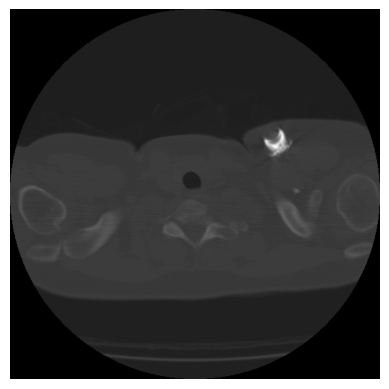

In [1]:
import pydicom
import matplotlib.pyplot as plt

dicom_file_path='data/test_dataset/LIDC-IDRI/LIDC-IDRI-0078/01-01-2000-NA-NA-68432/3165.000000-NA-53824/1-01.dcm'
dicom_data=pydicom.dcmread(dicom_file_path)

pixel_array=dicom_data.pixel_array


plt.imshow(pixel_array,cmap=plt.cm.gray)
plt.title="DICOM Image"
plt.axis('off')
plt.show()

In [2]:
print(dicom_data)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.305457156046178667359366041284
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.305457156046178667359366041284
(0008,0020) Study Date                          DA:

In [3]:
print(f"Patient Name: {dicom_data.PatientName}")
print(f"Patient ID: {dicom_data.PatientID}")
print(f"Modality: {dicom_data.Modality}")

Patient Name: 
Patient ID: LIDC-IDRI-0078
Modality: CT


(512, 512)


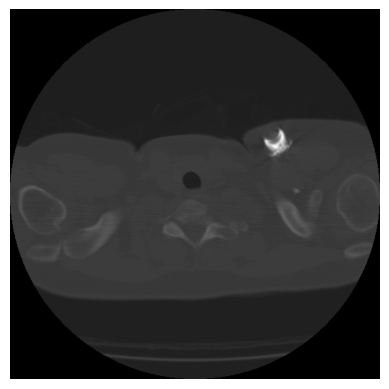

(512, 512)


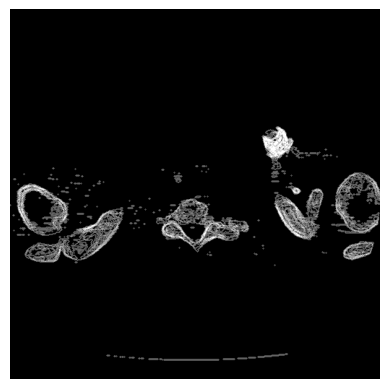

(512, 512)


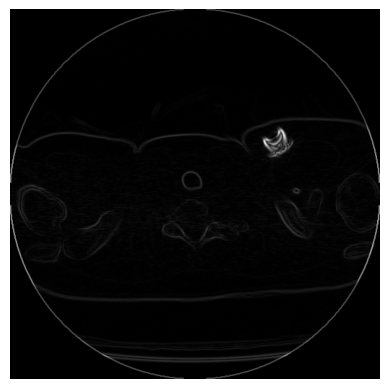

(512, 512)


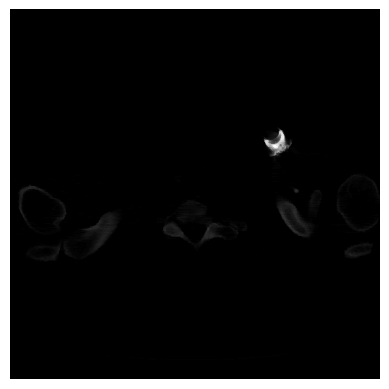

(512, 512)


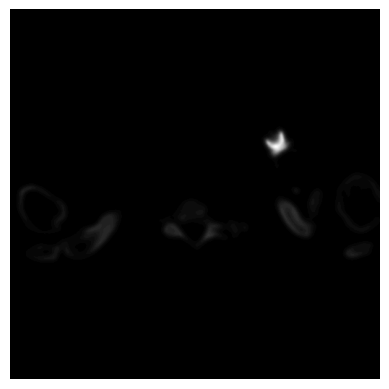

(512, 512)


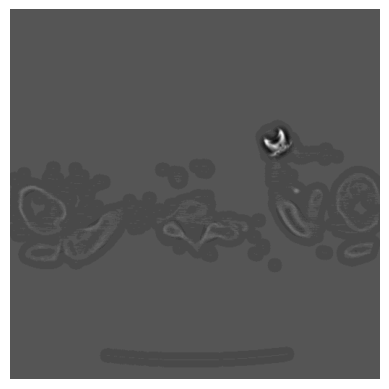

In [4]:
#applying filters to understand what king of filters could give us good insight
from skimage.util import img_as_ubyte
from skimage.morphology import disk
import numpy as np


pixel_array_unint8=img_as_ubyte(pixel_array)

from skimage.filters.rank import entropy
entropy_img=entropy(pixel_array_unint8,disk(1))


from skimage.filters import sobel
sobel_img=sobel(pixel_array)

from skimage.filters.rank import enhance_contrast
contrast_img=enhance_contrast(pixel_array_unint8, disk(1))

from skimage.filters.rank import geometric_mean
mean_img=geometric_mean(pixel_array_unint8, disk(5))

from skimage.filters.rank import subtract_mean
subtract_mean_img=subtract_mean(pixel_array_unint8, disk(10))

#actuly swhoing the images with the filters
#
# other filters imgs:
#       ,entropy_img,sobel_img,contrast_img,mean_img,subtract_mean_img


imgs=[pixel_array,entropy_img,sobel_img,contrast_img,mean_img,subtract_mean_img]
for img in imgs:
    print(img.shape)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title="DICOM Image"
    plt.axis('off')
    plt.show()
